<a href="https://colab.research.google.com/github/ayuksekdag/winacademy_python_dna/blob/main/final_assignment/final_co2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment / Questions

- What is the biggest predictor of a large CO2 output per capita of a country?
- Which countries are making the biggest strides in decreasing CO2 output?
- Which non-fossil fuel energy technology will have the best price in the future?

Biggest predictor of CO2 output

To determine this you may want to consider things like GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.

Your answer can also be a specific combination of certain factors. Anyway, remember to include the explanations in your report.


Biggest strides in decreasing CO2 output

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.


Biggest strides in decreasing CO2 output

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

In [109]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Scope of sources

- source 1: https://ourworldindata.org/population-growth
  - filename:population-and-demography.csv
  - alias: pop_ann_raw

- source 2: https://ourworldindata.org/co2-emissions
  - filename: annual-co2-emissions-per-country.csv
  - alias: c02_ann_raw

- source 3: https://ourworldindata.org/co2-emissions#per-capita-co2-emissions
  - filename: co2-per-capita-marimekko.csv
  - alias: co2_cap_raw

- source 4: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?most_recent_value_desc=true
  - filename: gdp-per-capita-worldbank.csv
  - alias: gdp_cap_raw

- source 5: https://ourworldindata.org/grapher/meat-consumption-vs-gdp-per-capita
  - filename: meat-consumption-vs-gdp-per-capita.csv
  - alias: meat_cap_raw




- source x: https://ourworldindata.org/grapher/per-capita-energy-use
  - filename: gdp-per-capita-worldbank
  - alias: gdp_engy

- source x: https://ourworldindata.org/grapher/levelized-cost-of-energy
  - filename:levelized-cost-of-energy.csv
  - alias: cost_engy

- source x: https://ourworldindata.org/population-growth
  - filename:population-and-demography.csv
  - alias: pop



In [110]:
#sources
pop_ann_raw = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/population-and-demography.csv')
c02_ann_raw = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/annual-co2-emissions-per-country.csv')
gdp_cap_raw = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/gdp-per-capita-worldbank.csv')
meat_cap_raw = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/meat-consumption-vs-gdp-per-capita.csv' )

cost_engy = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/levelized-cost-of-energy.csv')


# Data preparation
Renaming columns

Data conversions
  - year column to date

Cleaning of data.
  - Goal: All datasets must have same countries and same selection of years
  - How: To achieve this I take a inner join (intersection) of all datasets on country and year of the measure.


In [122]:
# remove column or select only columns needed and put them in a new dataframe
pop_ann_prep = pop_ann_raw[['Country name','Year','Population']].copy()
c02_ann_prep = c02_ann_raw[['Entity','Year','Annual CO₂ emissions']].copy()
gdp_cap_prep = gdp_cap_raw[['Entity','Year','GDP per capita, PPP (constant 2017 international $)']].copy()
meat_cap_prep = meat_cap_raw[['Entity','Year','Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita']].copy()

In [127]:
pop_ann_prep[pop_ann_prep['Country name']=='Netherlands']

,Country name,Year,Population
11592,Netherlands,1950,10093555
11593,Netherlands,1951,10226297
11594,Netherlands,1952,10361806
11595,Netherlands,1953,10497301
11596,Netherlands,1954,10631384
...,...,...,...
11659,Netherlands,2017,17207204
11660,Netherlands,2018,17286042
11661,Netherlands,2019,17363260
11662,Netherlands,2020,17434562


In [112]:
#rename long column names with spaces and special characters
pop_ann_prep.rename(columns={'Country name': 'Country'}, inplace=True)
c02_ann_prep.rename(columns={'Entity': 'Country', 'Annual CO₂ emissions': 'Annual_c02'}, inplace=True)
gdp_cap_prep.rename(columns={'Entity': 'Country','GDP per capita, PPP (constant 2017 international $)': 'Annual_gdp_per_cap'}, inplace=True)
meat_cap_prep.rename(columns={'Entity': 'Country','Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita': 'Annual_meat_per_cap'}, inplace=True)

In [113]:
#change datatype year to datetime
pop_ann_prep['Year'] = pd.to_datetime(pop_ann_prep['Year'], format='%Y')
c02_ann_prep['Year'] = pd.to_datetime(c02_ann_prep['Year'], format='%Y')
gdp_cap_prep['Year'] = pd.to_datetime(gdp_cap_prep['Year'], format='%Y')

#only meat filled
meat_cap_prep = meat_cap_prep[meat_cap_prep['Annual_meat_per_cap'].notnull()].copy()

#change datatype year to datetime
meat_cap_prep['Year'] = pd.to_datetime(meat_cap_prep['Year'], format='%Y')


# meat dataset needs cleaned before joining to avoid cartesian product
print(f' \n grootte pop_ann_prep  {pop_ann_prep.shape}')
print(f' \n grootte c02_ann_prep {c02_ann_prep.shape}')
print(f' \n grootte gdp_cap_prep {gdp_cap_prep.shape}')
print(f' \n grootte meat_cap_prep {meat_cap_prep.shape}')

 
 grootte pop_ann_prep  (18288, 3)
 
 grootte c02_ann_prep (31349, 3)
 
 grootte gdp_cap_prep (6346, 3)
 
 grootte meat_cap_prep (12360, 3)


In [114]:
# INTERSECTION (INNER JOIN) TO CREATE 1 DATASET BASED ON COUNTRY AND YEAR.
# The final result will be clean set of countries having both measures

dataset_key = ['Country','Year']

pop_ann_c02_prep = (
    pd.merge(pop_ann_prep,c02_ann_prep, how="inner", on=dataset_key, suffixes=('', '_y'))
)

pop_ann_c02_gdp_prep = (
    pd.merge(pop_ann_c02_prep ,gdp_cap_prep, how="inner", on=dataset_key, suffixes=('', '_y'))
)


pop_ann_c02_gdp_meat_prep = (
    pd.merge(pop_ann_c02_gdp_prep ,meat_cap_prep, how="inner", on=dataset_key, suffixes=('', '_y'))
)


print(f'final dataset struct pop_ann_c02_gdp_meat_prep \n\n{pop_ann_c02_gdp_meat_prep.dtypes}')

final dataset struct pop_ann_c02_gdp_meat_prep 

Country                        object
Year                   datetime64[ns]
Population                      int64
Annual_c02                    float64
Annual_gdp_per_cap            float64
Annual_meat_per_cap           float64
dtype: object


In [121]:
#calculate C02 per capita

pop_ann_c02_gdp_meat_prep['Annual_c02_per_cap'] = pop_ann_c02_gdp_meat_prep['Annual_c02'] / pop_ann_c02_gdp_meat_prep['Population']

print(f'final dataset struct pop_ann_c02_gdp_prep \n\n{pop_ann_c02_gdp_meat_prep.dtypes}')

pop_ann_c02_gdp_meat_prep[pop_ann_c02_gdp_meat_prep['Country']=='Netherlands']

final dataset struct pop_ann_c02_gdp_prep 

Country                        object
Year                   datetime64[ns]
Population                      int64
Annual_c02                    float64
Annual_gdp_per_cap            float64
Annual_meat_per_cap           float64
Annual_c02_per_cap            float64
dtype: object


,Country,Year,Population,Annual_c02,Annual_gdp_per_cap,Annual_meat_per_cap,Annual_c02_per_cap
0,Netherlands,2002-01-01,21000258,1340995.0,1280.4631,14.495209,0.063856
1,Netherlands,2003-01-01,22645136,1559602.0,1292.3335,13.168231,0.068871
2,Netherlands,2004-01-01,23553554,1237247.0,1260.0605,13.960530,0.052529
3,Netherlands,2005-01-01,24411196,1889507.0,1352.3207,14.268150,0.077403
4,Netherlands,2006-01-01,25442946,2159318.0,1366.9932,11.292855,0.084869
...,...,...,...,...,...,...,...
5139,Netherlands,2016-01-01,14452705,10533453.0,2286.6235,54.470207,0.728822
5140,Netherlands,2017-01-01,14751101,9596071.0,2331.7808,51.547085,0.650533
5141,Netherlands,2018-01-01,15052191,11795478.0,2399.6216,50.101578,0.783639
5142,Netherlands,2019-01-01,15354606,11114607.0,2203.3967,50.275642,0.723861


In [116]:
pop_ann_c02_gdp_meat_prep['Country']='World'
print(pop_ann_c02_gdp_meat_prep)

     Country       Year  Population  Annual_c02  Annual_gdp_per_cap  \
0      World 2002-01-01    21000258   1340995.0           1280.4631   
1      World 2003-01-01    22645136   1559602.0           1292.3335   
2      World 2004-01-01    23553554   1237247.0           1260.0605   
3      World 2005-01-01    24411196   1889507.0           1352.3207   
4      World 2006-01-01    25442946   2159318.0           1366.9932   
...      ...        ...         ...         ...                 ...   
5139   World 2016-01-01    14452705  10533453.0           2286.6235   
5140   World 2017-01-01    14751101   9596071.0           2331.7808   
5141   World 2018-01-01    15052191  11795478.0           2399.6216   
5142   World 2019-01-01    15354606  11114607.0           2203.3967   
5143   World 2020-01-01    15669663  10607897.0           1990.3195   

      Annual_meat_per_cap  Annual_c02_per_cap  
0               14.495209            0.063856  
1               13.168231            0.068871  
2  

### Question / Assumption /Answer 1:
- Question: What is the biggest predictor of a large CO2 output per capita of a country?
- Assumption: 1.There is a strong correlation between GDP and Co2 emmission. In general higher GDP per capita means more consumption and use of energy that results in more c02 emmision
- 2. as 2nd measure I;ve taking meat consumption per capita which should also strong corrolate with GDP and eventually C02 emission

- Answer: Yes the correlation is correct. The biggest predictor of large C02 is GDP per Capita


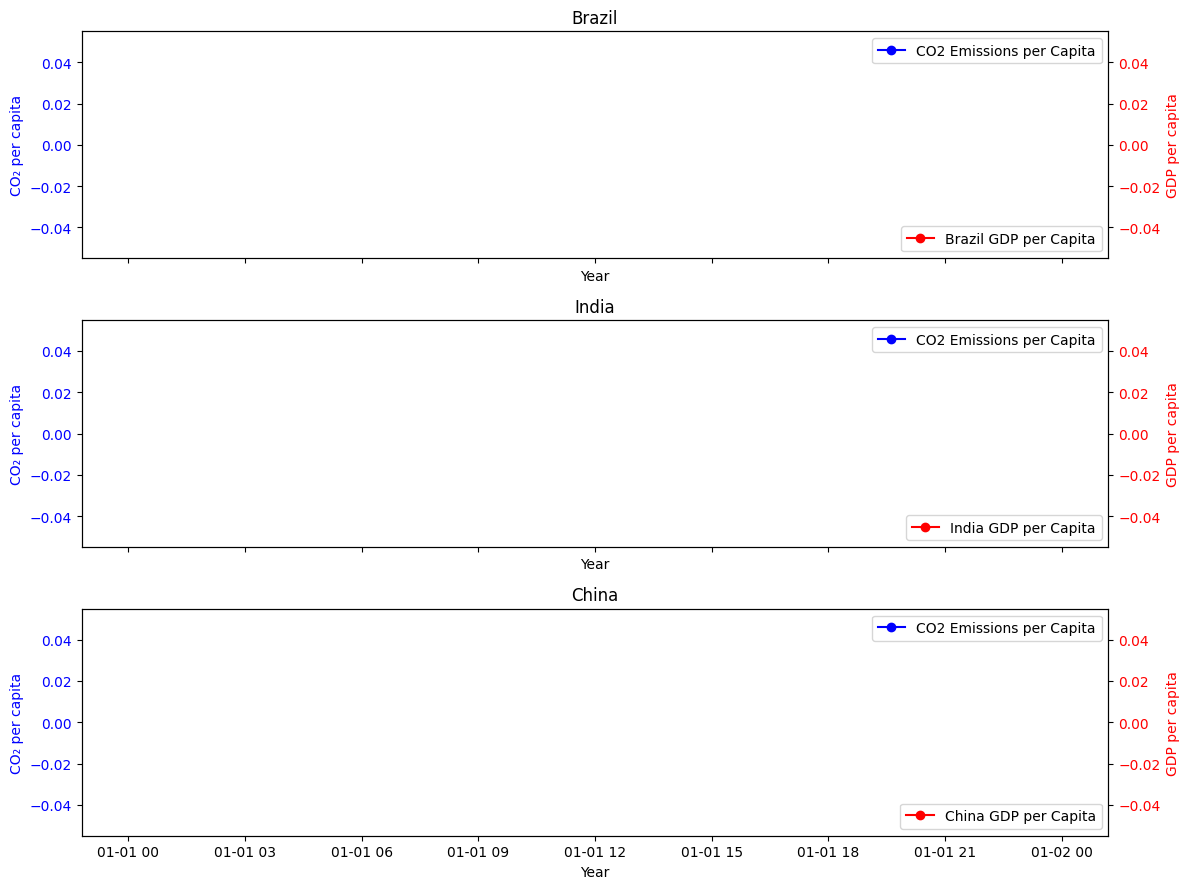

In [117]:
# We take 3 countries with large population
# 3 Bricks: China & India and Brazil
countries_to_plot = {"China", "India", "Brazil"}

# Create subplots
fig, ax = plt.subplots(len(countries_to_plot), 1, figsize=(12, 9), sharex=True)

c02_color='blue'
gdp_color='red'
pop_color='green'

#loop for every county
for i, country in enumerate(countries_to_plot):

  df = pop_ann_c02_gdp_meat_prep[pop_ann_c02_gdp_meat_prep["Country"] == country]

  # Plot the first measure c02  on the left y-axis
  # x-axis is year (shared)
  ax[i].set_title(f"{country}")
  ax[i].plot(df["Year"], df["Annual_c02_per_cap"], label="CO2 Emissions per Capita", marker='o', color=c02_color)

  ax[i].set_ylabel('CO₂ per capita', color=c02_color)
  ax[i].tick_params(axis='y', labelcolor=c02_color)
  ax[i].set_xlabel("Year")
  ax[i].legend()


  # Create a second y-axis for measure gdp on the right side
  # with a shared x-axis using year
  ax2 = ax[i].twinx()

  # Plot the second dataset on the right y-axis
  ax2.plot(df["Year"], df["Annual_gdp_per_cap"], label=f"{country} GDP per Capita", marker='o', color=gdp_color)
  ax2.set_ylabel('GDP per capita', color=gdp_color)
  ax2.tick_params(axis='y', labelcolor=gdp_color)
  ax2.legend(loc='lower right')


#plot it
plt.tight_layout()
plt.show()



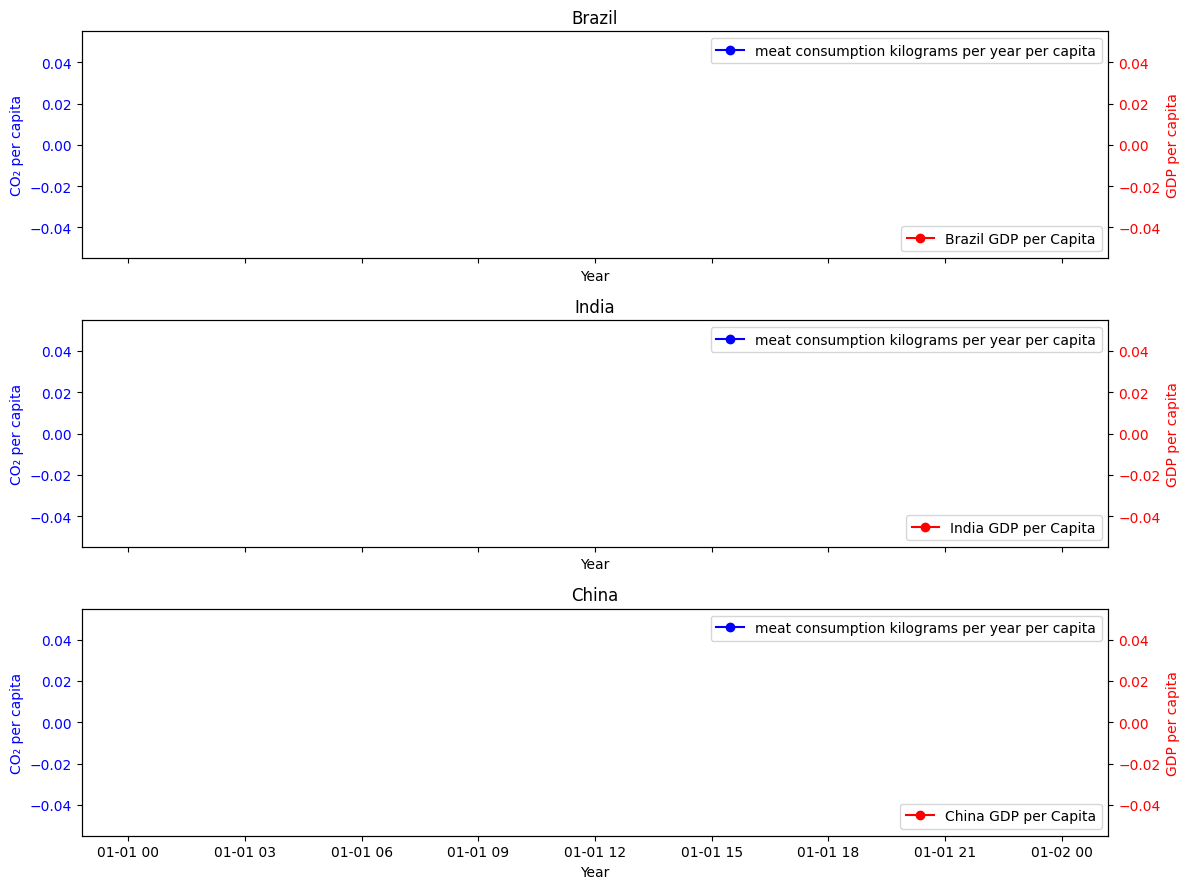

In [118]:
# We take 3 countries with large population
# 3 Bricks: China & India and Brazil
countries_to_plot = {"China", "India", "Brazil"}

# Create subplots
fig, ax = plt.subplots(len(countries_to_plot), 1, figsize=(12, 9), sharex=True)

c02_color='blue'
gdp_color='red'
pop_color='green'

#loop for every county
for i, country in enumerate(countries_to_plot):

  df = pop_ann_c02_gdp_meat_prep[pop_ann_c02_gdp_meat_prep["Country"] == country]

  # Plot the first measure c02  on the left y-axis
  # x-axis is year (shared)
  ax[i].set_title(f"{country}")
  ax[i].plot(df["Year"], df["Annual_meat_per_cap"], label="meat consumption kilograms per year per capita", marker='o', color=c02_color)

  ax[i].set_ylabel('CO₂ per capita', color=c02_color)
  ax[i].tick_params(axis='y', labelcolor=c02_color)
  ax[i].set_xlabel("Year")
  ax[i].legend()


  # Create a second y-axis for measure gdp on the right side
  # with a shared x-axis using year
  ax2 = ax[i].twinx()

  # Plot the second dataset on the right y-axis
  ax2.plot(df["Year"], df["Annual_gdp_per_cap"], label=f"{country} GDP per Capita", marker='o', color=gdp_color)
  ax2.set_ylabel('GDP per capita', color=gdp_color)
  ax2.tick_params(axis='y', labelcolor=gdp_color)
  ax2.legend(loc='lower right')


#plot it
plt.tight_layout()
plt.show()

### Question / Answer 2:
- Question : Which countries are making the biggest strides in decreasing CO2 output?
- Assumption:
  - 1 step: We calculate first the relative C02 emission using formula
  population by Country of that year divided by  latest population)
  - 2 We take the range (highest C02 emission per capita by Country ever - latest Year C02 per capita emmission). This measure should give the performance


The top 10 is listed in a stacked bar chart

In [108]:
c02_reduction_champs_prep = pop_ann_c02_gdp_meat_prep.copy()


world_c02 = c02_reduction_champs_prep[c02_reduction_champs_prep['Country']=='China']

world_c02


# c02_reduction_champs_prep['relative_c02'] = c02_reduction_champs_prep['Annual_c02'] /

,Country,Year,Population,Annual_c02,Annual_gdp_per_cap,Annual_meat_per_cap,Annual_c02_per_cap


In [ ]:

pop.head(4)


#get the max c02 by Entity
entity_max_c02= (merged_co2_gdp_engy
 .groupby('Entity')['c02']
 .agg(['max'])
)

#rename columm
entity_max_c02 = entity_max_c02.rename(columns={'max': 'max_c02'})

#get the max current data driven
entity_max_year = (merged_co2_gdp_engy
 .groupby('Entity')['Year']
 .agg({'max'}).reset_index()
)
#rename column
entity_max_year = entity_max_year.rename(columns={'max': 'Year'})

#merge the above sets on Entity
entity_c02_of_max_year = (
    pd.merge(
        entity_max_year, entity_max_c02, how="inner", on=['Entity'],suffixes=('', '_y'),sort=False
        )
    #  .drop(['Entity_y',"Year_y"], axis=1)

)


#merge again now to get the current c02 value on same row
entity_max_c02_and_max_year_c02=(
        pd.merge(
            entity_c02_of_max_year, co2_cap, how="inner", on=['Entity','Year'],suffixes=('', '_y'),sort=False
        )
        .drop(['Code',"Continent"], axis=1)
)

# derived column c02_difference
entity_max_c02_and_max_year_c02['c02_difference'] = entity_max_c02_and_max_year_c02['max_c02'] - entity_max_c02_and_max_year_c02['c02']


#prep for plot
entity_max_c02_and_max_year_c02.drop(['Year'], axis=1, inplace=True)
entity_max_c02_and_max_year_c02.set_index('Entity', inplace=True)
entity_max_c02_and_max_year_c02 = entity_max_c02_and_max_year_c02.rename(columns={'c02': 'current c02', 'max_c02': 'highest c02', 'c02_difference': 'c02 reduction'})


#plot it
(entity_max_c02_and_max_year_c02
   .sort_values('c02 reduction', ascending=False ).head(10)
   .plot(kind='bar', stacked=True
         , ylabel='c02'
         , title='Countries making biggest decrease of C02'
   )
)

NameError: ignored

### Question / Answer 3:
- Q: Which non-fossil fuel energy technology will have the best price in the future?
- A: take the all on rows on World level. Plot it using x-axis Year
Onshore seems to be lowest and going lower. Solar is following up.

In [ ]:
cost_engy.dtypes

In [ ]:
cost_engy.rename(columns={'Bioenergy levelized cost of energy': 'bioenergy',
                        'Geothermal levelized cost of energy':'geothermal',
                        'Offshore wind levelized cost of energy':'offshore_wind',
                        'Solar photovoltaic levelized cost of energy':'solar',
                        'Concentrated solar power levelized cost of energy':'concentrated_solar',
                        'Hydropower levelized cost of energy':'hydro',
                        'Onshore wind levelized cost of energy':'onshore_wind'
                        }, inplace=True)

cost_engy.dtypes

In [ ]:
df = cost_engy[cost_engy.Entity.isin(['World'])].copy()

#drop the unnecessary columns for the plot dataset
df.drop(['Entity','Code'], axis=1, inplace=True)

# set the x-axis ready for plot
df.set_index('Year', inplace=True)

#df.dtypes


In [ ]:
(
    df.plot(kind='line',
          ylabel='price $/kwh',
            title='Non fossil fuel energy costs')
)